In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd drive/MyDrive/FDA-Dataset

/content/drive/MyDrive/FDA-Dataset


In [4]:
import os

In [5]:
os.listdir()

['.DS_Store',
 'acc_climbingdown_csv-11',
 'acc_climbingdown_csv-4',
 'acc_running_csv-12',
 'acc_climbingdown_csv-2',
 'acc_running_csv-15',
 'acc_walking_csv-10',
 'acc_running_csv-14',
 'acc_climbingup_csv-10',
 'acc_climbingdown_csv-10',
 'acc_climbingdown_csv-5',
 'acc_running_csv-13',
 'acc_running_csv-2',
 'acc_walking_csv-2',
 'acc_climbingup_csv-7',
 'acc_running_csv-5',
 'acc_climbingup_csv-11',
 'acc_climbingup_csv-9',
 'acc_walking_csv-5',
 'acc_walking_csv-11',
 'acc_climbingdown_csv-3',
 'acc_climbingdown_csv-13',
 'acc_climbingdown_csv-14',
 'acc_walking_csv-3',
 'acc_running_csv-4',
 'acc_walking_csv-4',
 'acc_climbingup_csv-1',
 'acc_climbingup_csv-6',
 'acc_climbingdown_csv-15',
 'acc_running_csv-3',
 'acc_climbingup_csv-8',
 'acc_climbingdown_csv-8',
 'acc_walking_csv-14',
 'acc_walking_csv-13',
 'acc_climbingup_csv-13',
 'acc_climbingdown_csv-1',
 'acc_walking_csv-15',
 'acc_climbingdown_csv-6',
 'acc_running_csv-11',
 'acc_climbingup_csv-14',
 'acc_climbingdown_csv

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def s_entropy(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [11]:
col_list = ["Subject", "Accelerometer Axis", "Signal Length",
            "Dimension", "Delay", "Permutation Entropy", "Complexity", 
            "Activity"]
collect_df = pd.DataFrame(columns=col_list)

activities = ["climbingdown", "climbingup", "running", "walking"]
alias = ["Climbing Down", "Climbing Up", "Running", "Walking"]
activity_dict = dict(zip(activities, alias))

subjects = list(range(1, 16))
axis = list("xyz")
signals = [2024, 3048, 5096]
dimensions = [3, 4, 5, 6]
delays = [1, 2, 3]
sensors = ["chest"]

for subject in subjects:
  for activity in activities:
    for sensor in sensors:
      foldername = "acc_"+activity+"_csv-"+str(subject)
      filename = "acc_"+activity+"_"+sensor+".csv"
      print(foldername)
      df = pd.read_csv(foldername+"/"+filename)
      
      for ax in axis:
        for signal in signals:
          for dim in dimensions:
            for delay in delays:

              op = ordinal_patterns(df['attr_'+ax][1000:signal], dim, delay)

              res = [subject, ax.upper(), signal-1000, dim, delay,
                    p_entropy(op), complexity(op), activity_dict[activity]]

              d = dict(zip(col_list, res))
              collect_df = collect_df.append(d, ignore_index=True)




acc_climbingdown_csv-1
acc_climbingup_csv-1
acc_running_csv-1
acc_walking_csv-1
acc_climbingdown_csv-2
acc_climbingup_csv-2
acc_running_csv-2
acc_walking_csv-2
acc_climbingdown_csv-3
acc_climbingup_csv-3
acc_running_csv-3
acc_walking_csv-3
acc_climbingdown_csv-4
acc_climbingup_csv-4
acc_running_csv-4
acc_walking_csv-4
acc_climbingdown_csv-5
acc_climbingup_csv-5
acc_running_csv-5
acc_walking_csv-5
acc_climbingdown_csv-6
acc_climbingup_csv-6
acc_running_csv-6
acc_walking_csv-6
acc_climbingdown_csv-7
acc_climbingup_csv-7
acc_running_csv-7
acc_walking_csv-7
acc_climbingdown_csv-8
acc_climbingup_csv-8
acc_running_csv-8
acc_walking_csv-8
acc_climbingdown_csv-9
acc_climbingup_csv-9
acc_running_csv-9
acc_walking_csv-9
acc_climbingdown_csv-10
acc_climbingup_csv-10
acc_running_csv-10
acc_walking_csv-10
acc_climbingdown_csv-11
acc_climbingup_csv-11
acc_running_csv-11
acc_walking_csv-11
acc_climbingdown_csv-12
acc_climbingup_csv-12
acc_running_csv-12
acc_walking_csv-12
acc_climbingdown_csv-13
acc_

In [12]:
collect_df

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,X,1024,3,1,0.759158,0.181020,Climbing Down
1,1,X,1024,3,2,0.897264,0.088867,Climbing Down
2,1,X,1024,3,3,0.956774,0.039948,Climbing Down
3,1,X,1024,4,1,0.667331,0.263041,Climbing Down
4,1,X,1024,4,2,0.842625,0.171857,Climbing Down
...,...,...,...,...,...,...,...,...
6475,15,Z,4096,5,2,0.853950,0.210262,Walking
6476,15,Z,4096,5,3,0.898388,0.167176,Walking
6477,15,Z,4096,6,1,0.761754,0.293139,Walking
6478,15,Z,4096,6,2,0.873402,0.219104,Walking


3
X
4
X
5
X
6
X
3
Y
4
Y
5
Y
6
Y
3
Z
4
Z
5
Z
6
Z


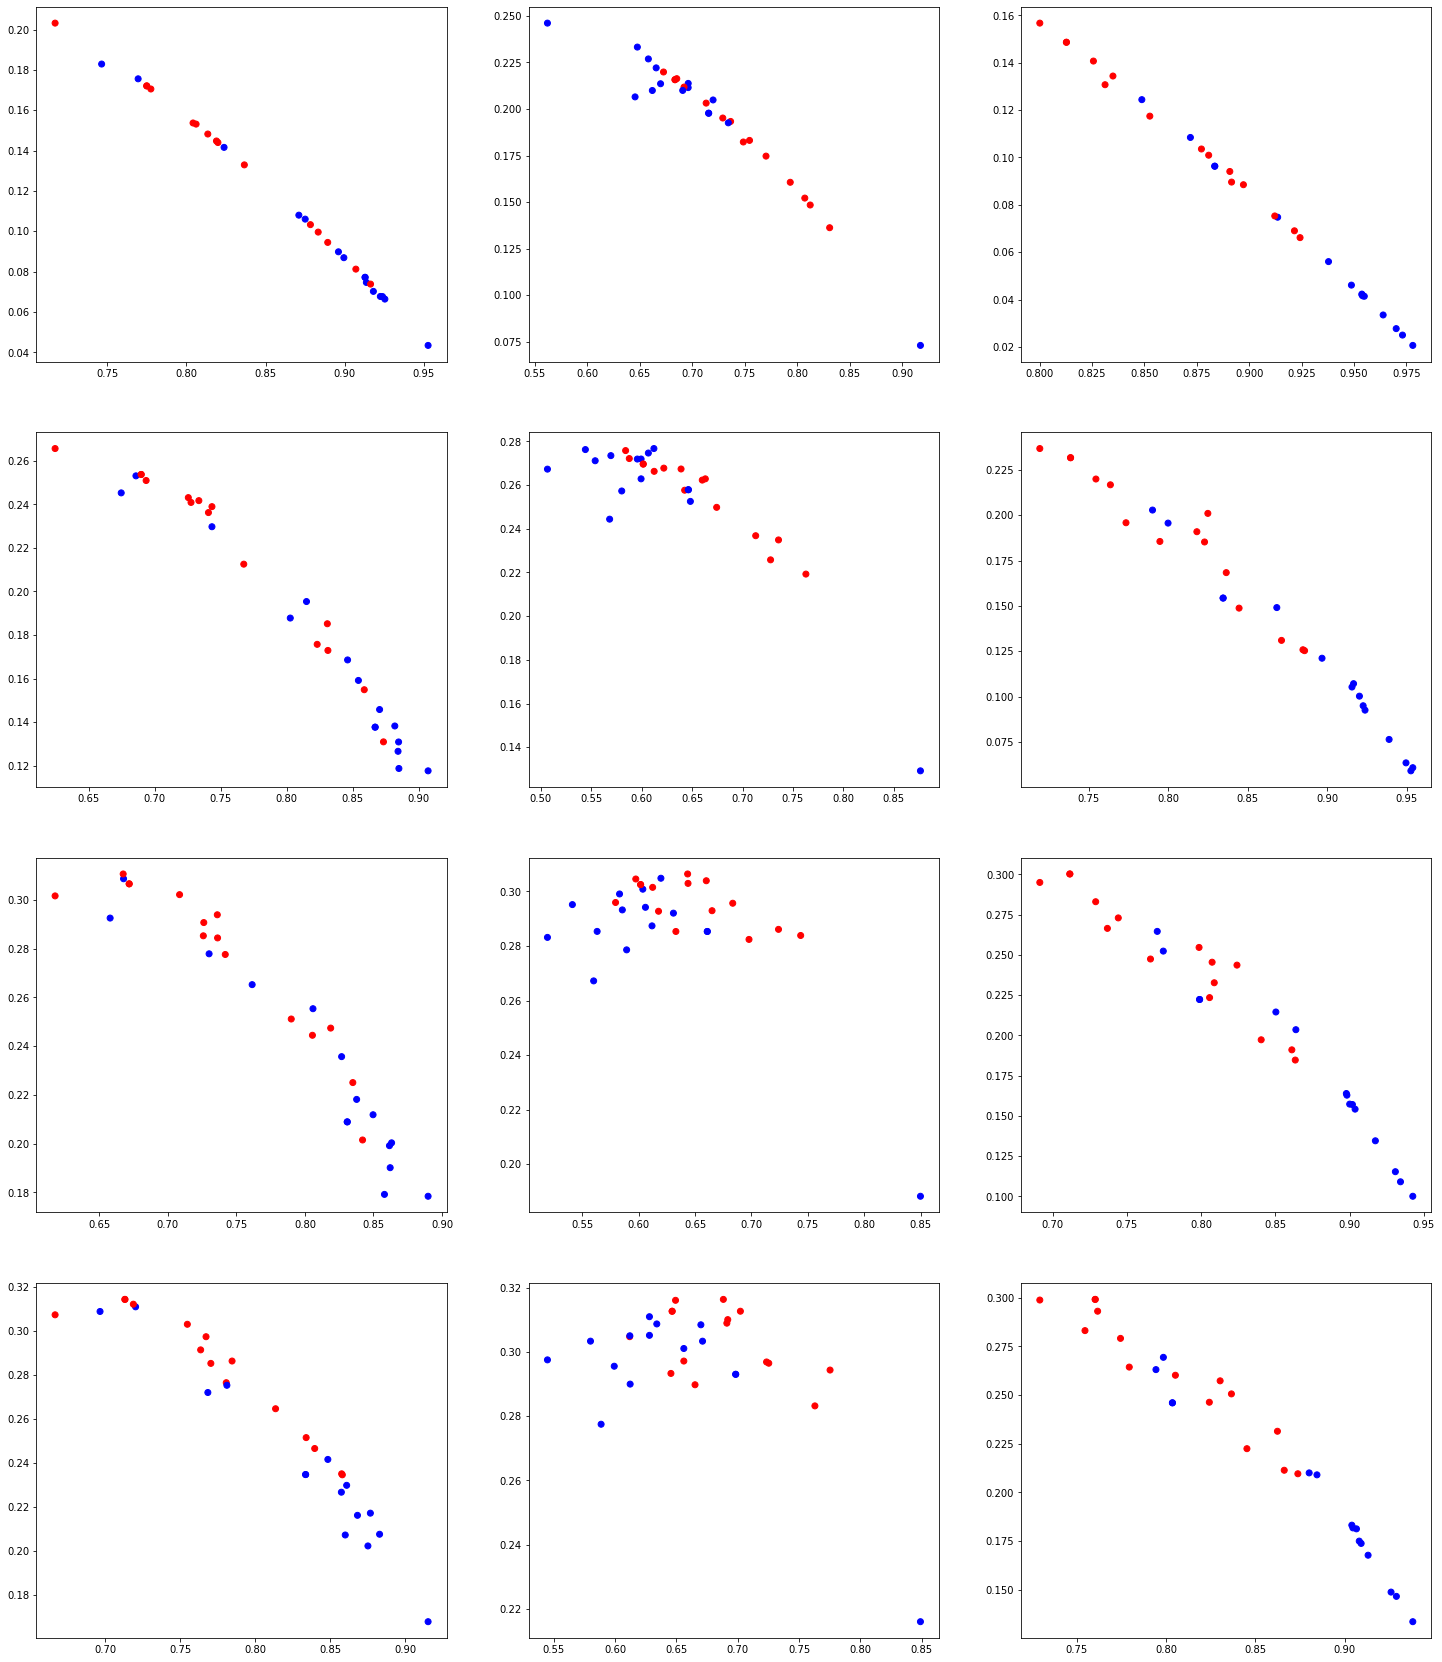

In [13]:
axis = list("XYZ")
activities = ["Walking", "Running"]
dimensions = [3, 4, 5, 6]
colors = dict(zip(activities, ["red", "blue"]))

fig, axs = plt.subplots(4, 3, figsize=(25, 30))

for i in range(len(axis)):
  for dim in range(len(dimensions)):
    df = collect_df[((collect_df["Activity"] == "Walking") | 
                     (collect_df["Activity"] == "Running")) & 
                    (collect_df["Dimension"] == dimensions[dim]) & 
                    (collect_df["Accelerometer Axis"] == axis[i]) & 
                    (collect_df["Delay"] == 1) &
                    (collect_df["Signal Length"] == 4096)]
    # print(dimensions[dim])
    # print(axis[i])

    axs[dim, i].scatter(x=df["Permutation Entropy"], 
                          y=df["Complexity"], 
                          c=df["Activity"].map(colors))

fig.show()

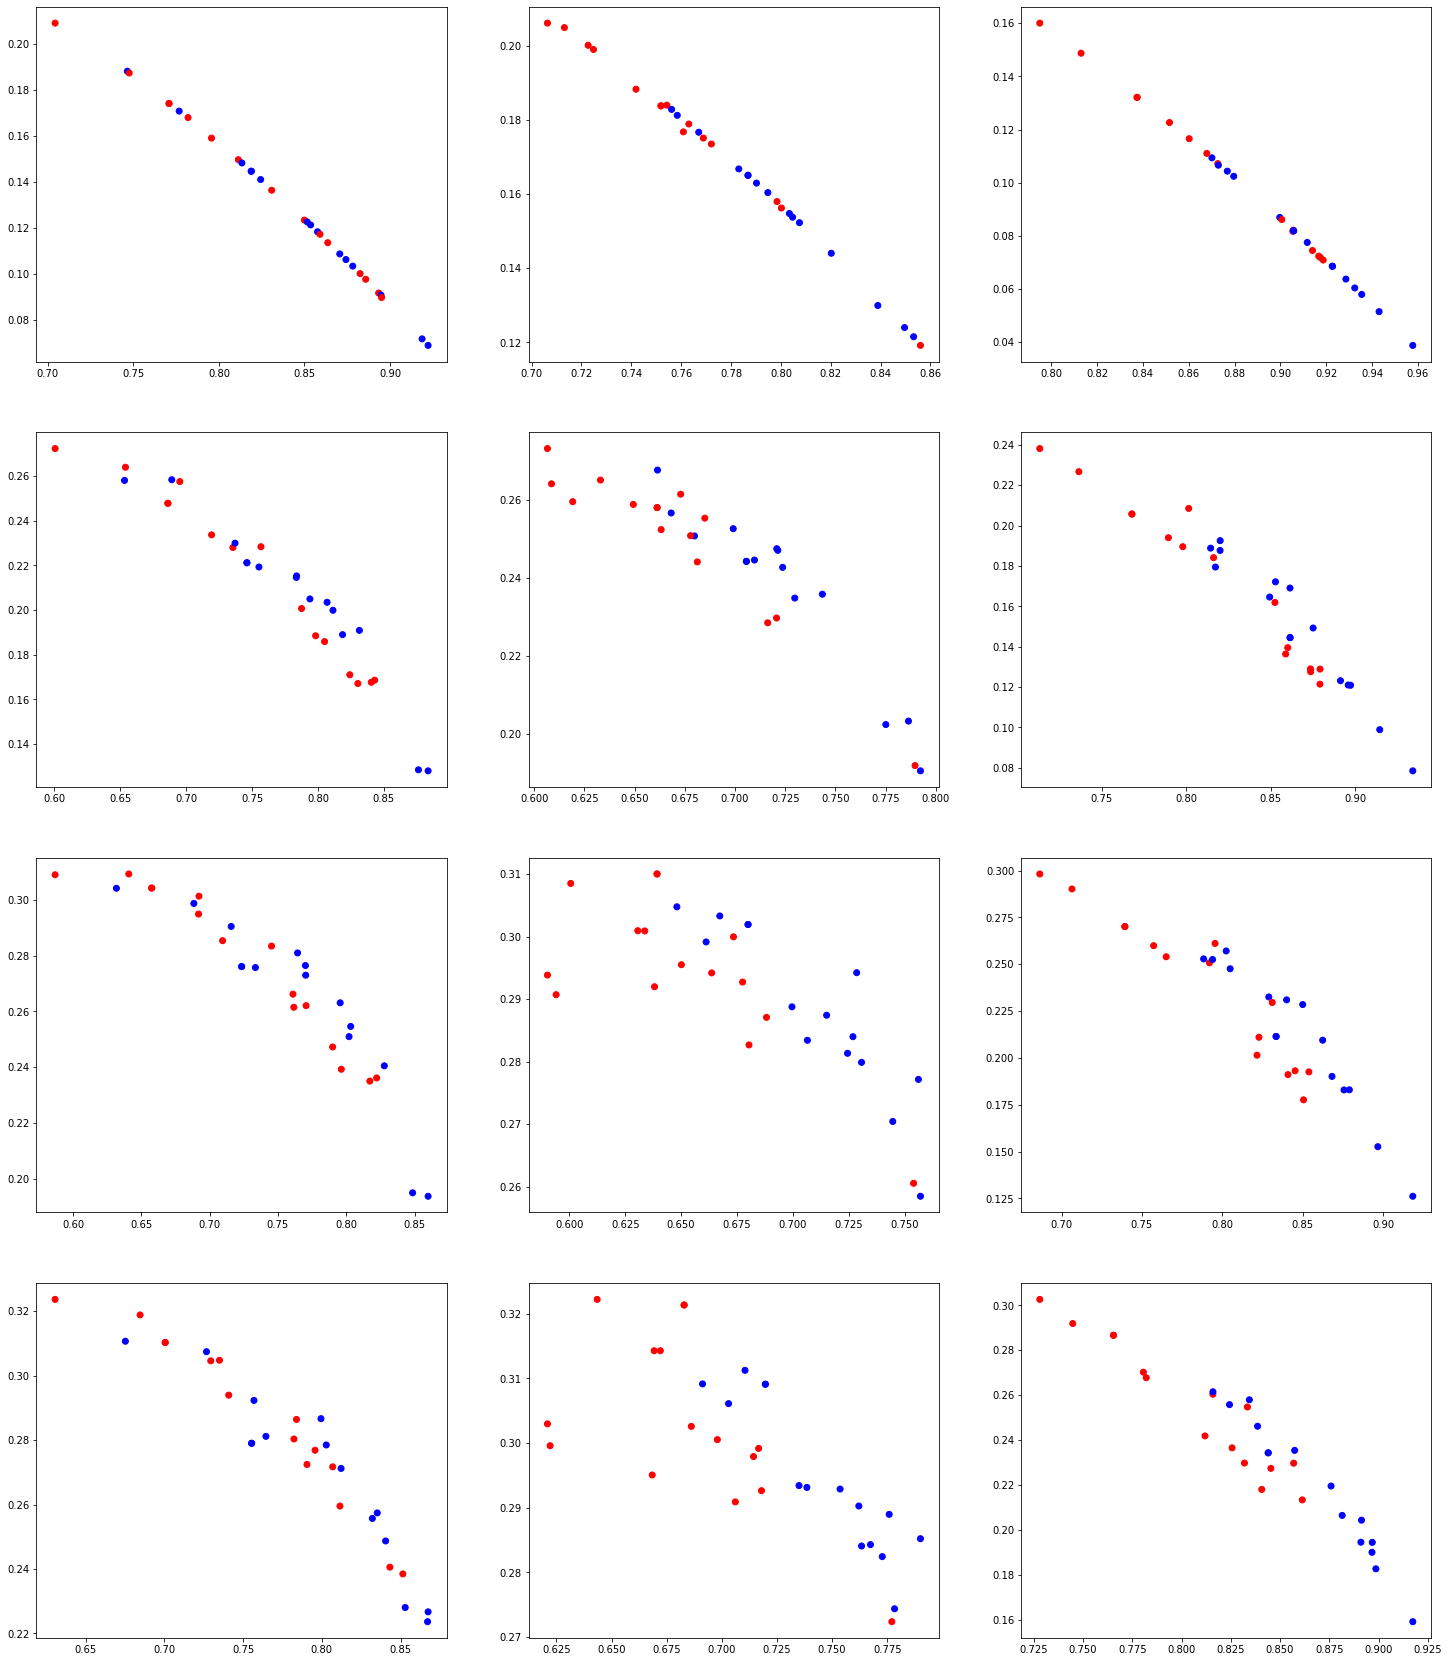

In [14]:
axis = list("XYZ")
activities = ["Climbing Up", "Climbing Down"]
dimensions = [3, 4, 5, 6]
colors = dict(zip(activities, ["red", "blue"]))

fig, axs = plt.subplots(4, 3, figsize=(25, 30))

for i in range(len(axis)):
  for dim in range(len(dimensions)):
    df = collect_df[((collect_df["Activity"] == "Climbing Up") | 
                     (collect_df["Activity"] == "Climbing Down")) & 
                    (collect_df["Dimension"] == dimensions[dim]) & 
                    (collect_df["Accelerometer Axis"] == axis[i]) & 
                    (collect_df["Delay"] == 1) &
                    (collect_df["Signal Length"] == 4096)]
    # print(dimensions[dim])
    # print(axis[i])

    axs[dim, i].scatter(x=df["Permutation Entropy"], 
                          y=df["Complexity"], 
                          c=df["Activity"].map(colors))

fig.show()